In [6]:
import string
import re
from IPython.core.debugger import set_trace
from collections import Counter
import matplotlib.pyplot as plt
from math import log, exp
import numpy as np
import random
%matplotlib inline
from populations import ReadData
import networkx as nx
import warnings
import Cdf
warnings.filterwarnings('ignore')


# Chapter 5: Scale-free Networks
<hr>

### CITS4403<br> Zachary Newman<br>21149116

## Synopsis

### Ex 5.1 Zipf’s Law

[('the', 5257), ('of', 3351), ('and', 2741), ('to', 2440), ('in', 1313)]


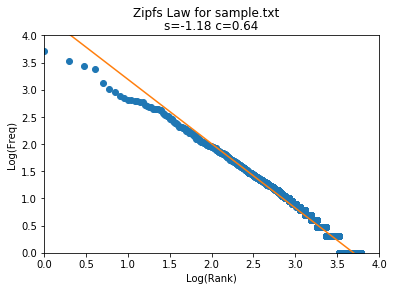

In [14]:
def plotZipfs(fileName):
    '''Reads text file and produces Zipfs rankings'''
    file = open(fileName, 'r')
    text = file.read().replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    text = re.sub(' +', ' ', text).split()
    ranks = Counter(text).most_common()
    print(Counter(text).most_common(5))
    y = []
    x = [log(x,10) for x in list(range(1, len(ranks)+1))]
    for rank in ranks:
        y.append(log(rank[1], 10))
    
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit)
    
    plt.plot(x, y, 'o', x, fit_fn(x))
    plt.axis([0, 4, 0, 4])
    plt.suptitle("Zipfs Law for %s" % fileName)
    plt.title("s=%.2f c=%.2f" % (fit[0], log(fit[1], 10)) )
    plt.ylabel("Log(Freq)")
    plt.xlabel("Log(Rank)")
        
    
plotZipfs('sample.txt')
    

### Exercise 5.2. Cumulative distributions
##### Find the order of growth for *MakeCdfFromList*
1. calls Pmf.MakeHistFromList which interates n times to make hist = O(n)
2. calls *MakeCdfFromHist* once = O(1)
3. calls *MakeCdfFromItems* = O(1)
    * sorts items with sorted method = O(nlogn)
    * iterates items to find counts and runsum = O(n)
    * iterates again to calculate probabilities = O(n)
    
Thus total growth order for *MakeCdfFromList* is **O(nlogn)**

##### Order of growth for class method *Prob*
1. If x is smaller than the first index value, 0.0 is returned = O(n)
2. Finds bisect index, bisect algorithm uses binary tree = O(logn)

Thus growth order of **O(n) in best case** and **O(logn) otherwise**.

##### Order of growth for class method *Value*
1. Raises value error if p is not in (0,1) = O(n)
2. Returns first or last value if p is 0 or 1 respectfully = O(n)
3. Finds bisect index, bisect algorithm uses binary tree = O(logn)
4. returns upper or lower corresponding value = O(n)

Thus growth order of **O(n) in best case** and **O(logn) otherwise**.
    

### Exercise 5.3. Continuous distributions

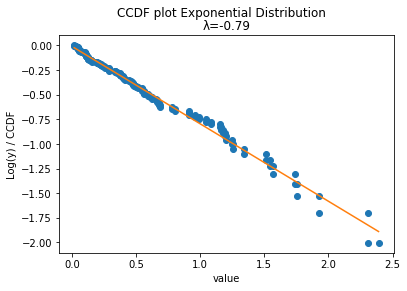

In [15]:
def makeSeqLists(vals):
    cdf = Cdf.MakeCdfFromList(values)
    xs, ys = cdf.Render()
    return xs, ys

def plot_ccdf(values, cdfs):
    values = values[:-1]
    cdfs = cdfs[:-1]
    ccdfs = [1-cdf for cdf in cdfs]
    log_ccdfs = [log(ccdf, 10) for ccdf in ccdfs]
    
    
    fit = np.polyfit(values, log_ccdfs, 1)
    fit_fn = np.poly1d(fit)
    
    plt.plot(values, log_ccdfs, 'o', values, fit_fn(values))
    plt.suptitle("CCDF plot Exponential Distribution")
    plt.title("\u03BB=%.2f" % fit[0])
    plt.ylabel("Log(y) / CCDF")
    plt.xlabel("value")

HALF_LIFE = 2.0
values = [random.expovariate(HALF_LIFE) for i in range(101)]
xs, ys = makeSeqLists(values)
plot_ccdf(xs, ys)

### 5.4 Pareto distributions

$$CDF(x)=1-{\frac{x}{x_m}}^{-\alpha}$$

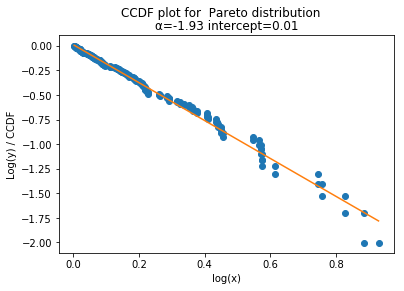

In [16]:
def plot_ccdf(vals):
    vals, cdfs = makeSeqLists(vals)
    vals = vals[:-1]
    cdfs = cdfs[:-1]
    
    ccdfs = [1-cdf for cdf in cdfs]
    log_y = [log(ccdf, 10) for ccdf in ccdfs]
    log_x = [log(x, 10) for x in vals]
    
    fit = np.polyfit(log_x, log_y, 1)
    fit_fn = np.poly1d(fit)
    
    plt.plot(log_x, log_y, 'o', log_x, fit_fn(log_x))
    plt.suptitle("CCDF plot for  Pareto distribution")
    plt.title("\u03B1=%.2f intercept=%.2f" % (fit[0], fit[1]))
    plt.ylabel("Log(y) / CCDF")
    plt.xlabel("log(x)")

ALPHA = 2
values = [random.paretovariate(ALPHA) for i in range(101)]
plot_ccdf(values)

### Exercise 5.5. CDF and CCDF of U.S. Bureau Population Data 

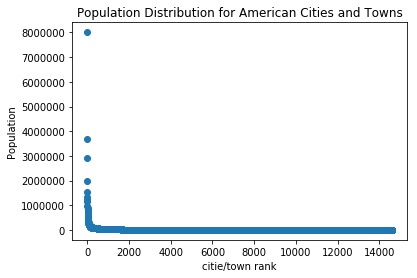

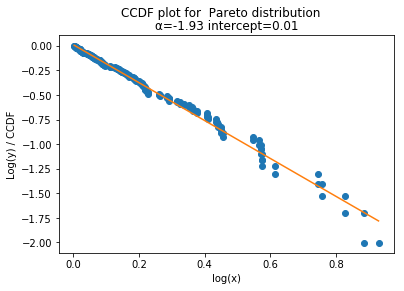

In [18]:
pops = sorted(ReadData(), reverse=True)
plt.plot(range(1,len(pops)+1), pops, 'o')
plt.title("Population Distribution for American Cities and Towns")
plt.xlabel("citie/town rank")
plt.ylabel("Population")
plt.show()

plot_ccdf(pops)

## Exercise 5.5 Barabási and Albert
### 1. Replicating Graph 

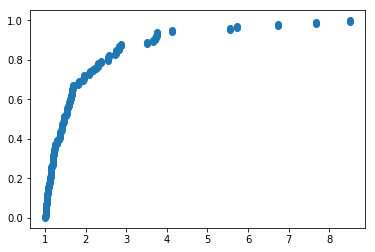

In [20]:
g1 = nx.barabasi_albert_graph(50, 2)
degs = sorted([g1.degree(i) for i in g1.nodes()], reverse=True)
degs, probs = makeSeqLists(degs)
plt.plot(degs, probs, 'o')

## References